# Prediction using Unsupervised ML

# Task 2 K-Means Clustering 

## By Ishmeet Singh

In [1]:
# Importing the libraries
#setting environment variables 
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

In [2]:
#loading the data set
iris=datasets.load_iris() 
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


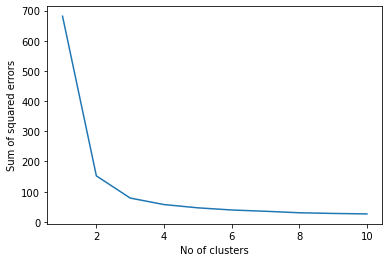

In [3]:
# list of sum of squared  errors within clusters
sse=[]


for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])  
    sse.append(km.inertia_)   
plt.xlabel('No of clusters')
plt.ylabel("Sum of squared errors")
# Plotting the results onto a line graph, 
# `to observe 'The elbow'
plt.plot(range(1,11),sse)

the elbow mehod shows the value of no of clusters is 3 at the elbow (this is where optimun no of clusters occur

In [4]:
# Applying kmeans to the dataset
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

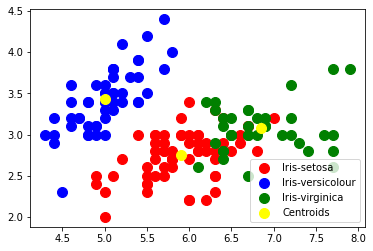

In [5]:
#visualizing the clusters on first two columns 

x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()